In [16]:
import pschitt.geometry as geo
import numpy as np
import matplotlib.pyplot as plt
import pschitt.sky_objects as sky
import pschitt.camera_image as ci
import pschitt.hillas as hillas
import pschitt.vizualisation as viz
from importlib import reload
import math

In [17]:
%matplotlib inline

In [18]:
shower = sky.shower()

shower.impact_point = np.array([400,200,0])

#shower direction
shower.alt = math.radians(70)
shower.az = math.radians(70)

#pointing direction off-axis
talt = math.radians(68)
taz = math.radians(70)

#shower parameters
shower_top = 12000
shower_length = 8000
shower_width = 100

shower.number_of_particles = int(1e4)

In [19]:
shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

In [20]:
tel_normal = geo.altaz_to_normal(talt,taz)
tel1 = geo.Telescope([200,200,0],tel_normal)
tel2 = geo.Telescope([-200,200,0],tel_normal)
tel3 = geo.Telescope([-200,-200,0],tel_normal)
tel4 = geo.Telescope([200,-200,0],tel_normal)
tel5 = geo.Telescope([0,0,0],tel_normal)
tel6 = geo.Telescope([1000,-500,0],tel_normal)

alltel = [tel1, tel2, tel3, tel4, tel5, tel6]

In [21]:
# alltel = geo.load_telescopes('../share/arrays/CTA_paranal.txt', normal=geo.altaz_to_normal(talt, taz))

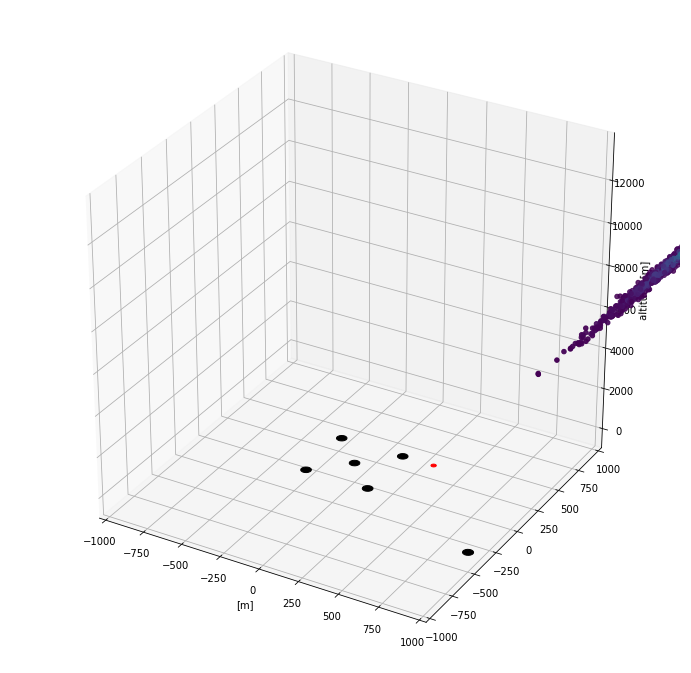

In [22]:
plt.figure(figsize=(9,6))
viz.plot_shower3d(shower, alltel, density_color=True)
# plt.savefig('../Images/ICRC2017/shower3D.eps', fmt='eps', dpi=300)

(753.055300489059, 4951.108281117731, 1716.9273356567437, 13788.06536186153)

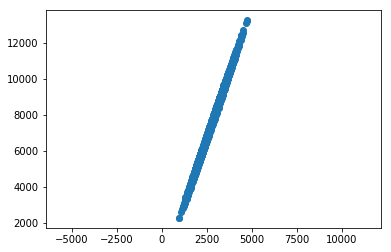

In [23]:
# projection
plt.scatter(shower.particles[:,1], shower.particles[:,2])
plt.axis('equal')

## Photosphere distribution along each axis

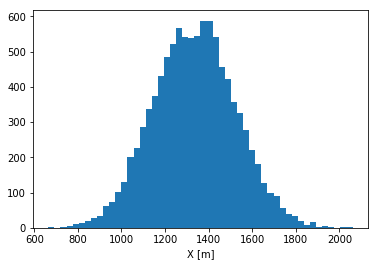

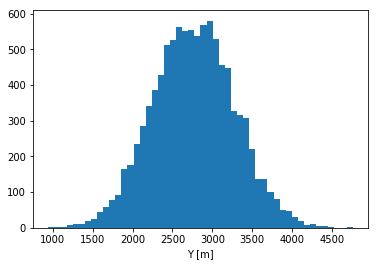

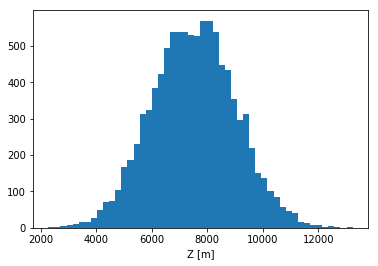

In [24]:
plt.hist(shower.particles[:,0], bins=50);
plt.xlabel("X [m]");
plt.show()

plt.hist(shower.particles[:,1], bins=50);
plt.xlabel("Y [m]");
plt.show()

plt.hist(shower.particles[:,2], bins=50);
plt.xlabel("Z [m]");
plt.show()

## Site Map

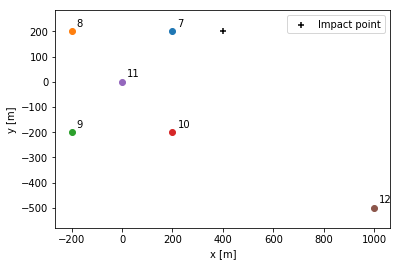

In [25]:
ax = viz.plot_array(alltel)
ax.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker="+")
ax.legend()

## Producing images in telescopes

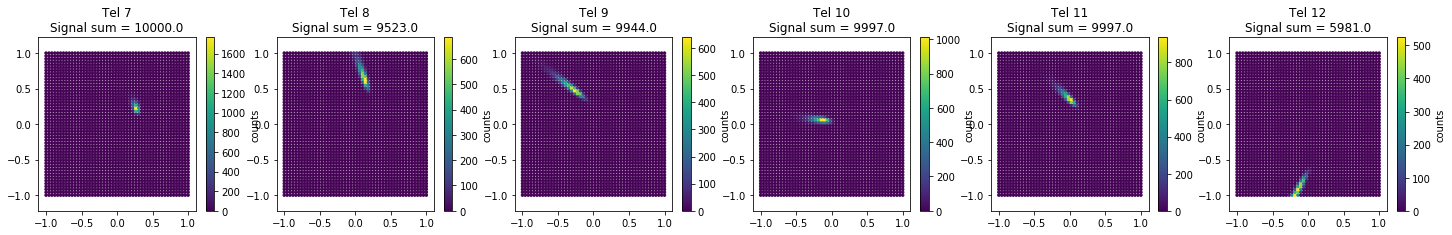

In [26]:
trigger_intensity = 20.
noise = 0

ci.array_shower_imaging(shower, alltel, noise)

fig, axes = plt.subplots(1, len(alltel), figsize=(20,3))
plt.tight_layout()
for tel, ax in zip(alltel, axes):
    ax = viz.display_camera_image(tel, ax=ax, s=6)
    ax.set_title("Tel {0}\nSignal sum = {1}".format(tel.id, tel.signal_hist.sum()))

## Hillas reconstruction

Number of triggered telescopes =  6


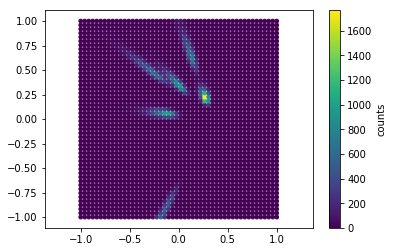

In [27]:
HP, triggered_telescopes = hillas.array_hillas_parameters(alltel, trigger_intensity)
print("Number of triggered telescopes = ", len(triggered_telescopes))


if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

viz.display_stacked_cameras(alltel, s=14)

### Surimposed Hillas directions

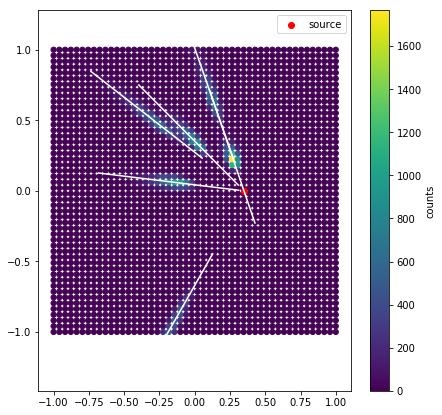

In [28]:
plt.figure(figsize=(7,7))
ax = viz.display_stacked_cameras(alltel, s=27)
x = np.linspace(-0.5, 0.5)
for tel, hp in zip(triggered_telescopes, HP):
    ax.plot(hp[1] + x*np.cos(hp[7] + math.pi/2.), hp[2] + x*np.sin(hp[7] + math.pi/2.), color="white")
plt.scatter(tel1.focal * (shower.alt-talt), tel1.focal * (shower.az-taz), color="red", label="source")
plt.legend()

### On site directions

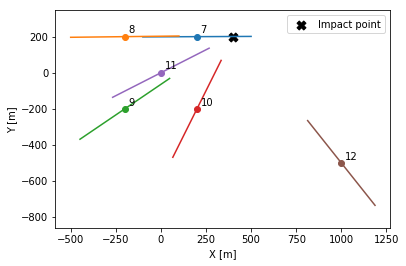

In [29]:
viz.plot_array_reconstructed(triggered_telescopes, HP, shower.impact_point)

In [30]:
if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

if len(triggered_telescopes)>1:
    print("Real impact parameter : ", shower.impact_point)
    print("Reconstruction with simple average = %s \tError = %.2fm" % (pa, math.sqrt(((shower.impact_point-pa)**2).sum())))
    print("Reconstruction with ponderation and cut = %s \tError = %.2fm" % (p, math.sqrt(((shower.impact_point-p)**2).sum())))

Real impact parameter :  [400 200   0]
Reconstruction with simple average = [359.0090529568254, 210.94692206937268, 0.0] 	Error = 42.43m
Reconstruction with ponderation and cut = [408.00639420172473, 211.04648628499973, 0.0] 	Error = 13.64m
